In [1]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x1 = []
y1 = []
x2 = []
y2 = []
state = []
arc_x1 = []
arc_y1 = []
arc_x2 = []
arc_y2 = []
arc_center_x = []
arc_center_y = []
assembly_copper = 0
type = []  # conflict to print(type(variable_name)),must to change variable_name
arc_type = []
f = open("Problem.txt", "r")
for line in f.readlines():
    s = line.split(",")
    if s[0] == "line":
        x1.append(s[1])
        y1.append(s[2])
        x2.append(s[3])
        y2.append(s[4].replace("\n", ""))
        if assembly_copper == 0:
            type.append("assembly")
        else:
            type.append("copper")
    elif s[0] == "arc":
        arc_x1.append(s[1])
        arc_y1.append(s[2])
        arc_x2.append(s[3])
        arc_y2.append(s[4])
        arc_center_x.append(s[5])
        arc_center_y.append(s[6])
        state.append(s[7].replace("\n", ""))
        if assembly_copper == 0:
            arc_type.append("assembly")
        else:
            arc_type.append("copper")
    else:
        if s[0] == "assembly\n":
            assembly_copper = 0
        elif s[0] == "copper\n":
            assembly_copper = 1
f.close()


In [3]:
print(x1)
print(y1)
print(x2)
print(y2)
print(arc_x1)
print(arc_y1)
print(arc_x2)
print(arc_y2)
print(arc_center_x)
print(arc_center_y)
print(state)
print(type)
print(arc_type)


['-0.4276', '1.9290', '1.9290', '3.7143', '3.7143', '13.2835', '13.2835', '15.7829', '14.8417', '13.5942', '13.5942', '15.7829', '15.7829', '13.2835', '13.2835', '12.2481', '12.2481', '11.7482', '11.7482', '11.1055', '11.1055', '10.6056', '10.6056', '9.8201', '9.8201', '9.3202', '9.3202', '8.6775', '8.6775', '8.1776', '8.1776', '7.3563', '7.3563', '5.9281', '5.9281', '5.4282', '5.4282', '4.9641', '4.9641', '4.4642', '4.4642', '4.0357', '4.0357', '3.5358', '3.5358', '2.0881', '0.5722', '1.2863', '-0.2134', '-0.2134', '0.5722', '0.5722', '-0.4276', '5.2460', '5.2460', '6.0573', '6.0573', '3.3884', '3.3884', '4.1997', '4.1997', '-0.2840', '0.9544', '0.9544', '0.9544', '-0.2840', '-0.2840', '12.1529', '12.1529', '12.4654', '12.7600', '12.7600', '12.4564', '11.7779', '11.7779', '12.0904', '12.3850', '12.3850', '12.0814', '11.3941', '11.3941', '11.7066', '12.0012', '12.0012', '11.6976', '12.5279', '12.5279', '12.8404', '13.1350', '13.1350', '12.8314', '10.6532', '10.6532', '10.9657', '11.260

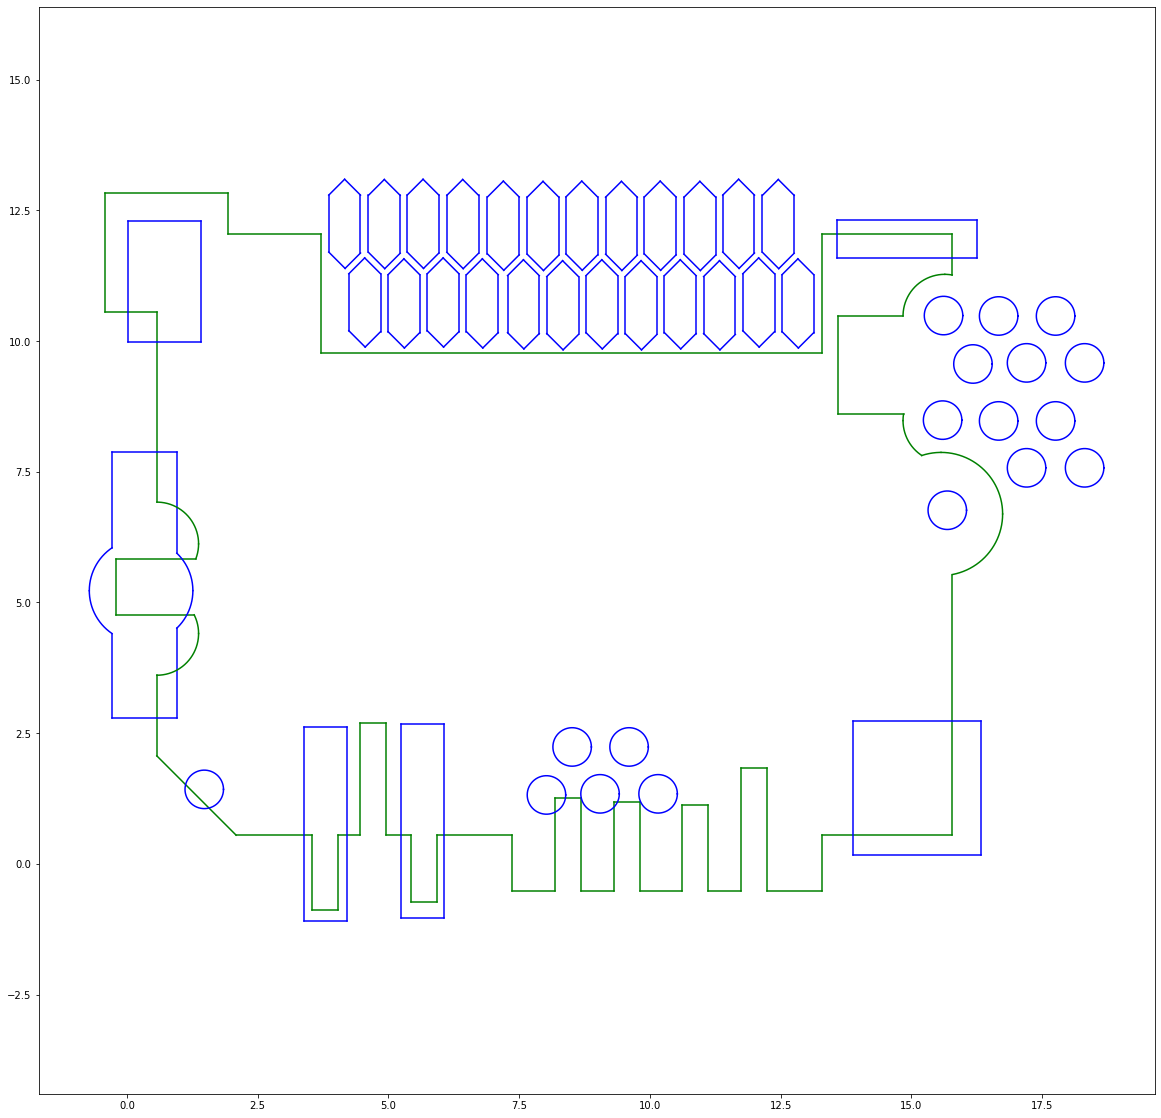

In [4]:
plt.figure(figsize=(20, 20))
plt.axis("equal")
for i in range(len(x1)):
    if type[i] == "assembly":
        plt.plot(
            [float(x1[i]), float(x2[i])], [float(y1[i]), float(y2[i])], color="green"
        )
    else:
        plt.plot(
            [float(x1[i]), float(x2[i])], [float(y1[i]), float(y2[i])], color="blue"
        )

for i in range(len(arc_x1)):
    radius = pow(
        pow(float(arc_center_x[i]) - float(arc_x1[i]), 2)
        + pow(float(arc_center_y[i]) - float(arc_y1[i]), 2),
        0.5,
    )
    radius = round(radius, 4)
    radian1 = math.atan2(
        (float(arc_y1[i]) - float(arc_center_y[i])),
        (float(arc_x1[i]) - float(arc_center_x[i])),
    )
    radian2 = math.atan2(
        (float(arc_y2[i]) - float(arc_center_y[i])),
        (float(arc_x2[i]) - float(arc_center_x[i])),
    )

    if state[i] == "CW":
        if radian1 > radian2:
            radian_arr = np.arange(
                radian1, radian2, -0.001
            )  # more precise，more complete
        elif radian1 < radian2:
            radian_arr = np.arange(radian1, -np.pi, -0.001)
            radian_arr = np.append(radian_arr, np.arange(np.pi, radian2, -0.001))
        else:
            radian_arr = np.arange(0, 2 * np.pi, 0.001)
    else:
        if radian1 > radian2:
            radian_arr = np.arange(radian1, np.pi, 0.001)
            radian_arr = np.append(radian_arr, np.arange(-np.pi, radian2, 0.001))
        elif radian1 < radian2:
            radian_arr = np.arange(radian1, radian2, 0.001)
        else:
            radian_arr = np.arange(0, 2 * np.pi, 0.001)
    x = float(arc_center_x[i]) + radius * np.cos(radian_arr)
    y = float(arc_center_y[i]) + radius * np.sin(radian_arr)
    if arc_type[i] == "assembly":
        plt.plot(x, y, color="green")
    else:
        plt.plot(x, y, color="blue")



In [5]:
x1_ = []
y1_ = []
x2_ = []
y2_ = []
state_ = []
arc_x1_ = []
arc_y1_ = []
arc_x2_ = []
arc_y2_ = []
arc_center_x_ = []
arc_center_y_ = []

f = open("Result.txt", "r")
for line in f.readlines():
    s = line.split(",")
    if s[0] == "line":
        x1_.append(s[1])
        y1_.append(s[2])
        x2_.append(s[3])
        y2_.append(s[4].replace("\n", ""))

    elif s[0] == "arc":
        arc_x1_.append(s[1])
        arc_y1_.append(s[2])
        arc_x2_.append(s[3])
        arc_y2_.append(s[4])
        arc_center_x_.append(s[5])
        arc_center_y_.append(s[6])
        state_.append(s[7].replace("\n", ""))
f.close()


In [6]:
print(x1_)
print(y1_)
print(x2_)
print(y2_)
print(arc_x1_)
print(arc_y1_)
print(arc_x2_)
print(arc_y2_)
print(arc_center_x_)
print(arc_center_y_)
print(state_)


['-0.4276', '2.0790', '1.9290', '3.8643', '3.7143', '13.1335', '13.2835', '15.9329', '14.8417', '13.7442', '13.5942', '15.9329', '15.7829', '13.4335', '13.2835', '12.0981', '12.2481', '11.8982', '11.7482', '10.9555', '11.1055', '10.7556', '10.6056', '9.6701', '9.8201', '9.4702', '9.3202', '8.5275', '8.6775', '8.3276', '8.1776', '7.2063', '7.3563', '6.0781', '5.9281', '5.2782', '5.4282', '4.8141', '4.9641', '4.6142', '4.4642', '4.1857', '4.0357', '3.3858', '3.5358', '1.9820', '0.4222', '1.2863', '-0.3634', '-0.2134', '0.4222', '0.5722', '-0.5776']
['12.9824', '12.8324', '12.1969', '12.0469', '9.9117', '9.7617', '12.1969', '12.0469', '10.3271', '10.4771', '8.7482', '5.5328', '0.3995', '0.5495', '-0.6717', '-0.5217', '1.6850', '1.8350', '-0.6717', '-0.5217', '0.9709', '1.1209', '-0.6717', '-0.5217', '1.0423', '1.1923', '-0.6717', '-0.5217', '1.1137', '1.2637', '-0.6717', '-0.5217', '0.3995', '0.5495', '-0.8859', '-0.7359', '0.3995', '0.5495', '2.5419', '2.6919', '0.3995', '0.5495', '-1.02

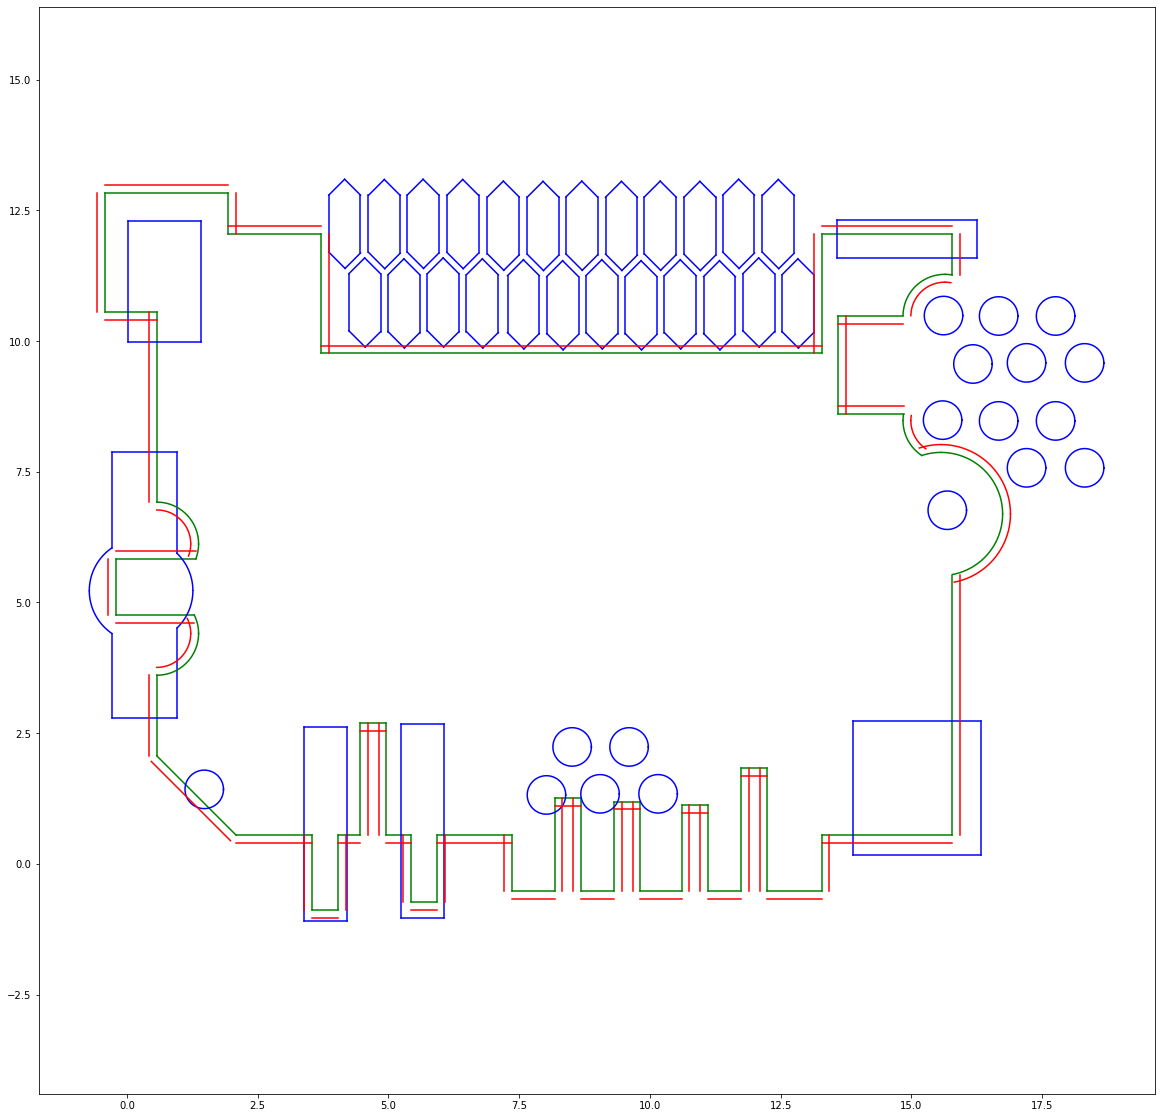

In [7]:
plt.figure(figsize=(20, 20))
plt.axis("equal")

for i in range(len(x1)):  # assembly and copper
    if type[i] == "assembly":
        plt.plot(
            [float(x1[i]), float(x2[i])], [float(y1[i]), float(y2[i])], color="green"
        )
    else:
        plt.plot(
            [float(x1[i]), float(x2[i])], [float(y1[i]), float(y2[i])], color="blue"
        )

for i in range(len(arc_x1)):
    radius = pow(
        pow(float(arc_center_x[i]) - float(arc_x1[i]), 2)
        + pow(float(arc_center_y[i]) - float(arc_y1[i]), 2),
        0.5,
    )
    radius = round(radius, 4)
    radian1 = math.atan2(
        (float(arc_y1[i]) - float(arc_center_y[i])),
        (float(arc_x1[i]) - float(arc_center_x[i])),
    )
    radian2 = math.atan2(
        (float(arc_y2[i]) - float(arc_center_y[i])),
        (float(arc_x2[i]) - float(arc_center_x[i])),
    )
    if state[i] == "CW":
        if radian1 > radian2:
            radian_arr = np.arange(radian1, radian2, -0.01)
        elif radian1 < radian2:
            radian_arr = np.arange(radian1, -np.pi, -0.01)
            radian_arr = np.append(radian_arr, np.arange(np.pi, radian2, -0.01))
        else:
            radian_arr = np.arange(0, 2 * np.pi, 0.001)
    else:
        if radian1 > radian2:
            radian_arr = np.arange(radian1, np.pi, 0.01)
            radian_arr = np.append(radian_arr, np.arange(-np.pi, radian2, 0.01))
        elif radian1 < radian2:
            radian_arr = np.arange(radian1, radian2, 0.01)
        else:
            radian_arr = np.arange(0, 2 * np.pi, 0.001)
    x = float(arc_center_x[i]) + radius * np.cos(radian_arr)
    y = float(arc_center_y[i]) + radius * np.sin(radian_arr)
    if arc_type[i] == "assembly":
        plt.plot(x, y, color="green")
    else:
        plt.plot(x, y, color="blue")


for i in range(len(x1_)):  # silkscreen
    plt.plot(
        [float(x1_[i]), float(x2_[i])], [float(y1_[i]), float(y2_[i])], color="red"
    )

for i in range(len(arc_x1_)):
    radius = pow(
        pow(float(arc_center_x_[i]) - float(arc_x1_[i]), 2)
        + pow(float(arc_center_y_[i]) - float(arc_y1_[i]), 2),
        0.5,
    )
    radius = round(radius, 4)
    radian1 = math.atan2(
        (float(arc_y1_[i]) - float(arc_center_y_[i])),
        (float(arc_x1_[i]) - float(arc_center_x_[i])),
    )
    radian2 = math.atan2(
        (float(arc_y2_[i]) - float(arc_center_y_[i])),
        (float(arc_x2_[i]) - float(arc_center_x_[i])),
    )
    if state_[i] == "CW":
        if radian1 > radian2:
            radian_arr = np.arange(radian1, radian2, -0.01)
        elif radian1 < radian2:
            radian_arr = np.arange(radian1, -np.pi, -0.01)
            radian_arr = np.append(radian_arr, np.arange(np.pi, radian2, -0.01))
        else:
            radian_arr = np.arange(0, 2 * np.pi, 0.001)
    else:
        if radian1 > radian2:
            radian_arr = np.arange(radian1, np.pi, 0.01)
            radian_arr = np.append(radian_arr, np.arange(-np.pi, radian2, 0.01))
        elif radian1 < radian2:
            radian_arr = np.arange(radian1, radian2, 0.01)
        else:
            radian_arr = np.arange(0, 2 * np.pi, 0.001)
    x = float(arc_center_x_[i]) + radius * np.cos(radian_arr)
    y = float(arc_center_y_[i]) + radius * np.sin(radian_arr)
    plt.plot(x, y, color="red")
